In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/project2/dataset - netflix1 (1).csv


In [22]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Helps to visualize missing values in each columns
import missingno as msno

# Simple & Easy way to overview dataset
from ydata_profiling import ProfileReport

# Used for choosing most frequently shown country.
from collections import Counter

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
sns.set_theme(style= 'darkgrid', palette = 'pastel')

/kaggle/input/project2/dataset - netflix1 (1).csv


In [23]:
df_net = pd.read_csv('/kaggle/input/project2/dataset - netflix1 (1).csv')

In [24]:
df_net.head()

show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dramas, TV Horror, TV Mysteries  
3                 Children & Family Movies, Comedies  
4   Dramas, Independent Movies, International Movies

In [25]:
df_net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [26]:
df_net.describe()

release_year
count   8790.000000
mean    2014.183163
std        8.825466
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000

In [27]:
df_net.isna().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/opt/conda/lib/python3.10/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Axes: >

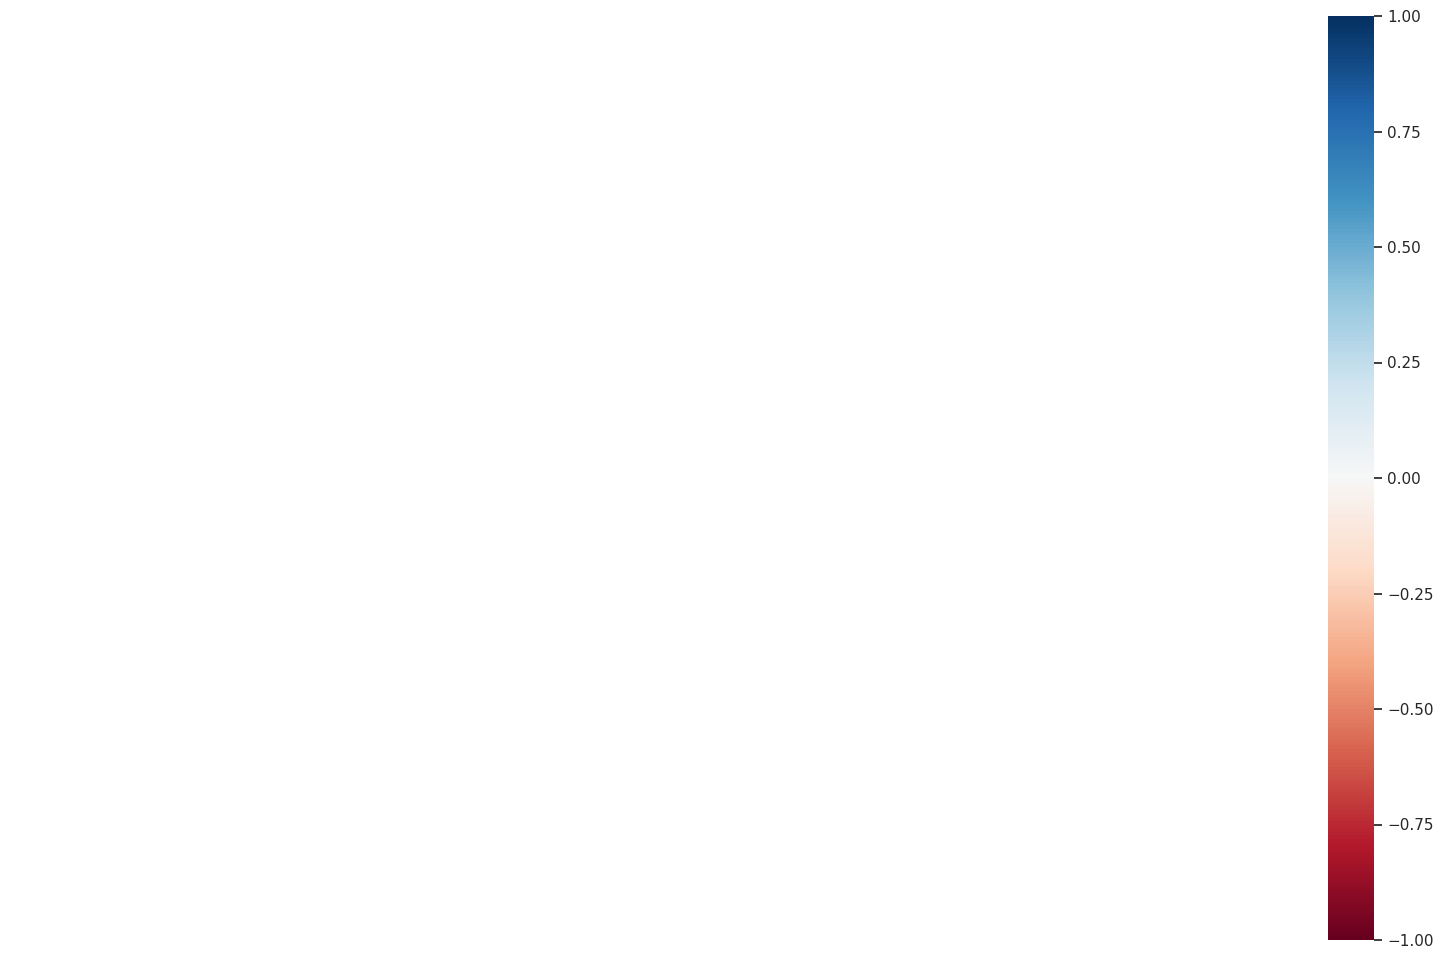

In [28]:
# Showing NaN values by using heatmap
msno.heatmap(df_net)

no null values.

In [29]:
ProfileReport(df_net)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [30]:
df_net.drop(['director', 'date_added'], axis=1, inplace=True)

In [31]:
Counter(df_net['country']).most_common(1)

[('United States', 3240)]

In [32]:
df_net['country'] = df_net['country'].fillna('United States')
df_net['country'].isna().sum()


0

In [33]:
#After finishing cleaning NaN values, lets do our second task!
df_net['main_country']=df_net['country'].apply(lambda x:x.split(',')[0])
df_net.drop('country', axis=1, inplace=True)

In [34]:
df_net.head()

show_id     type                             title  release_year rating  \
0      s1    Movie              Dick Johnson Is Dead          2020  PG-13   
1      s3  TV Show                         Ganglands          2021  TV-MA   
2      s6  TV Show                     Midnight Mass          2021  TV-MA   
3     s14    Movie  Confessions of an Invisible Girl          2021  TV-PG   
4      s8    Movie                           Sankofa          1993  TV-MA   

   duration                                          listed_in   main_country  
0    90 min                                      Documentaries  United States  
1  1 Season  Crime TV Shows, International TV Shows, TV Act...         France  
2  1 Season                 TV Dramas, TV Horror, TV Mysteries  United States  
3    91 min                 Children & Family Movies, Comedies         Brazil  
4   125 min   Dramas, Independent Movies, International Movies  United States

In [35]:
df_net.isna().sum()

show_id         0
type            0
title           0
release_year    0
rating          0
duration        0
listed_in       0
main_country    0
dtype: int64

**3. Data Visualization**



Which Country has made most Movie or TV Show?


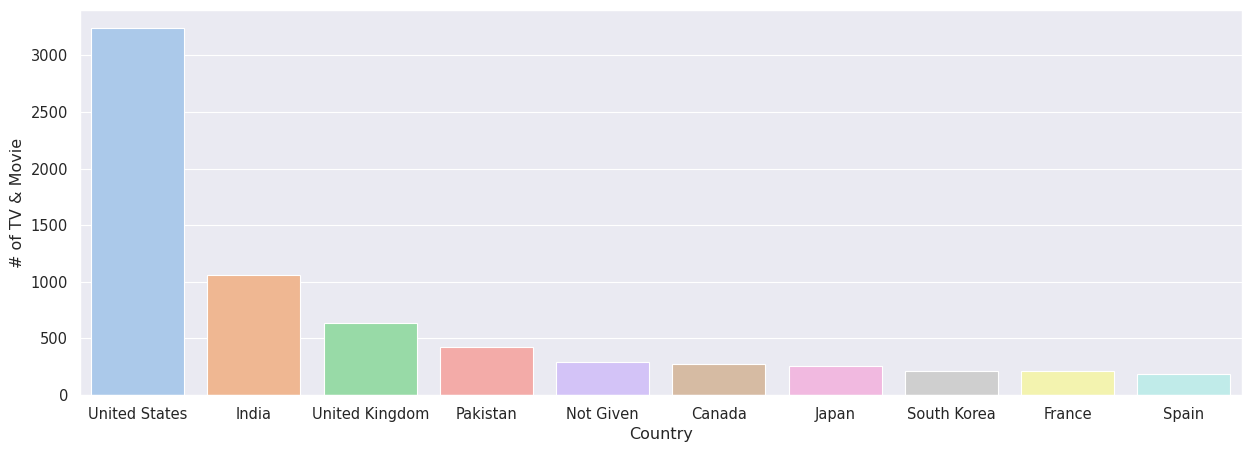

In [36]:
#Making new DataFrame by using country and type features
count_type = df_net.groupby(['main_country']).count()
most_country = count_type['type'].to_frame().reset_index().sort_values(by='type', ascending=False)[:10]

#Visualizing using seaborn
plt.figure(figsize=(15,5))
sns.set_context('paper', font_scale=1.2)
sns.barplot(x='main_country', y='type', data=most_country)
plt.ylabel('# of TV & Movie')
plt.xlabel('Country')
plt.show()

**Get the percentage of genre**

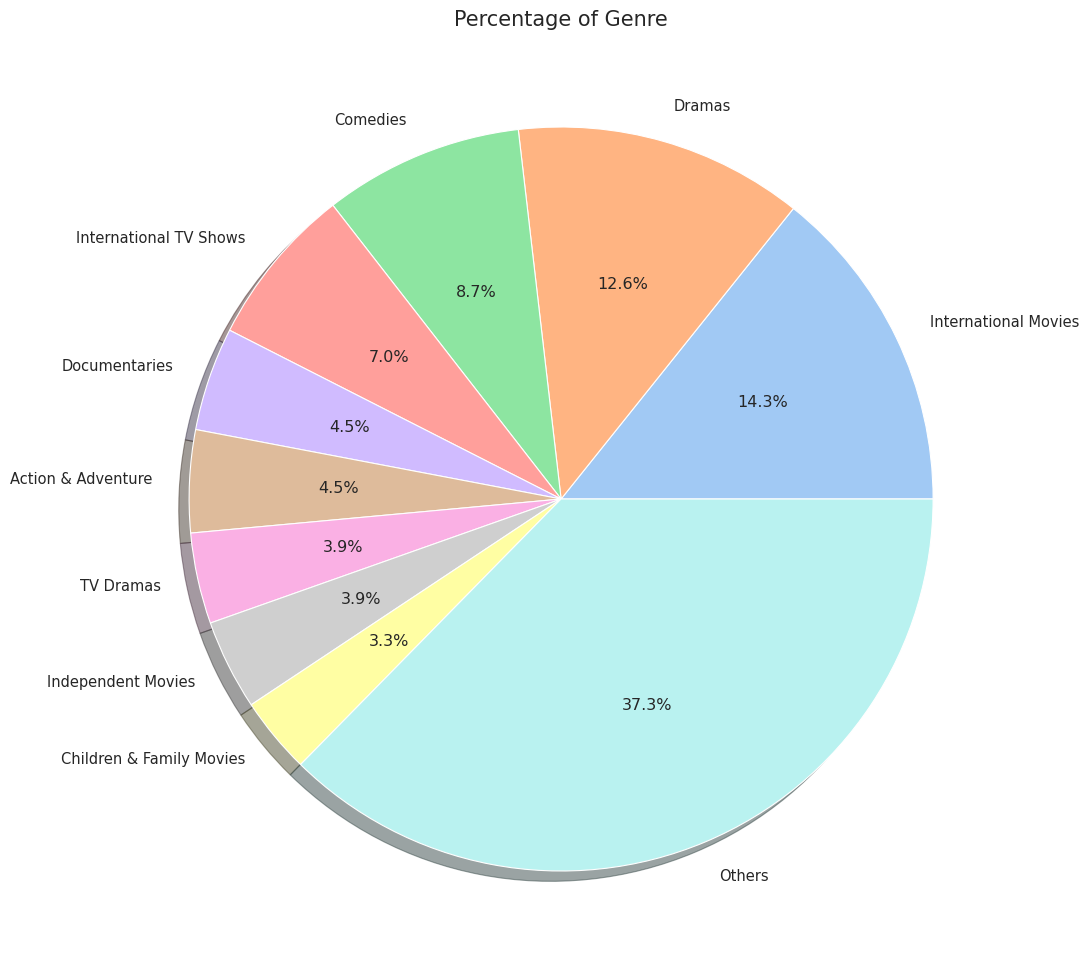

In [37]:
#Extract most 10 genre from netflix to visualize the percentage of genre
top9_genre = [(lambda x: x)(x.strip()) for x in ','.join(df_net['listed_in']).split(',')]
top9_list = list(Counter(top9_genre).most_common(9))
total_genre=len(top9_genre)
labels = [(lambda x:x)(x[0]) for x in top9_list]
labels.append('Others')
sizes = [(lambda x:x)(x[1]) for x in top9_list]
sizes.append(total_genre - sum(sizes))

#Visualizing using matplotlib
plt.figure(figsize=(12,15))
plt.title('Percentage of Genre', fontsize=15)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
plt.show()

*Visualize how many the number of Movie and TV Show has increased in each decade*

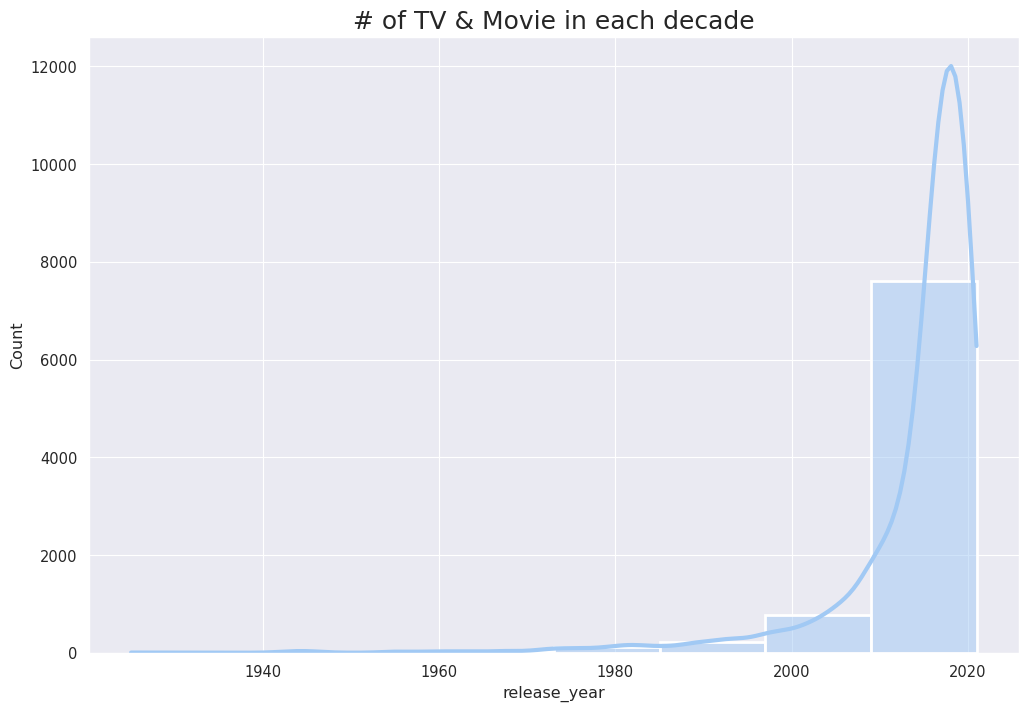

In [38]:
#Visualizing using matplotlib
plt.figure(figsize=(12,8))
plt.title('# of TV & Movie in each decade', fontsize=18)
sns.set_context("poster", font_scale = 0.8)
sns.histplot(df_net['release_year'], bins=8, kde=True)
plt.show()

**Understanding what content is available in different countries**



*Since there are too many countries, I am going to use top 3 which is United States, India, and United Kingdom.*

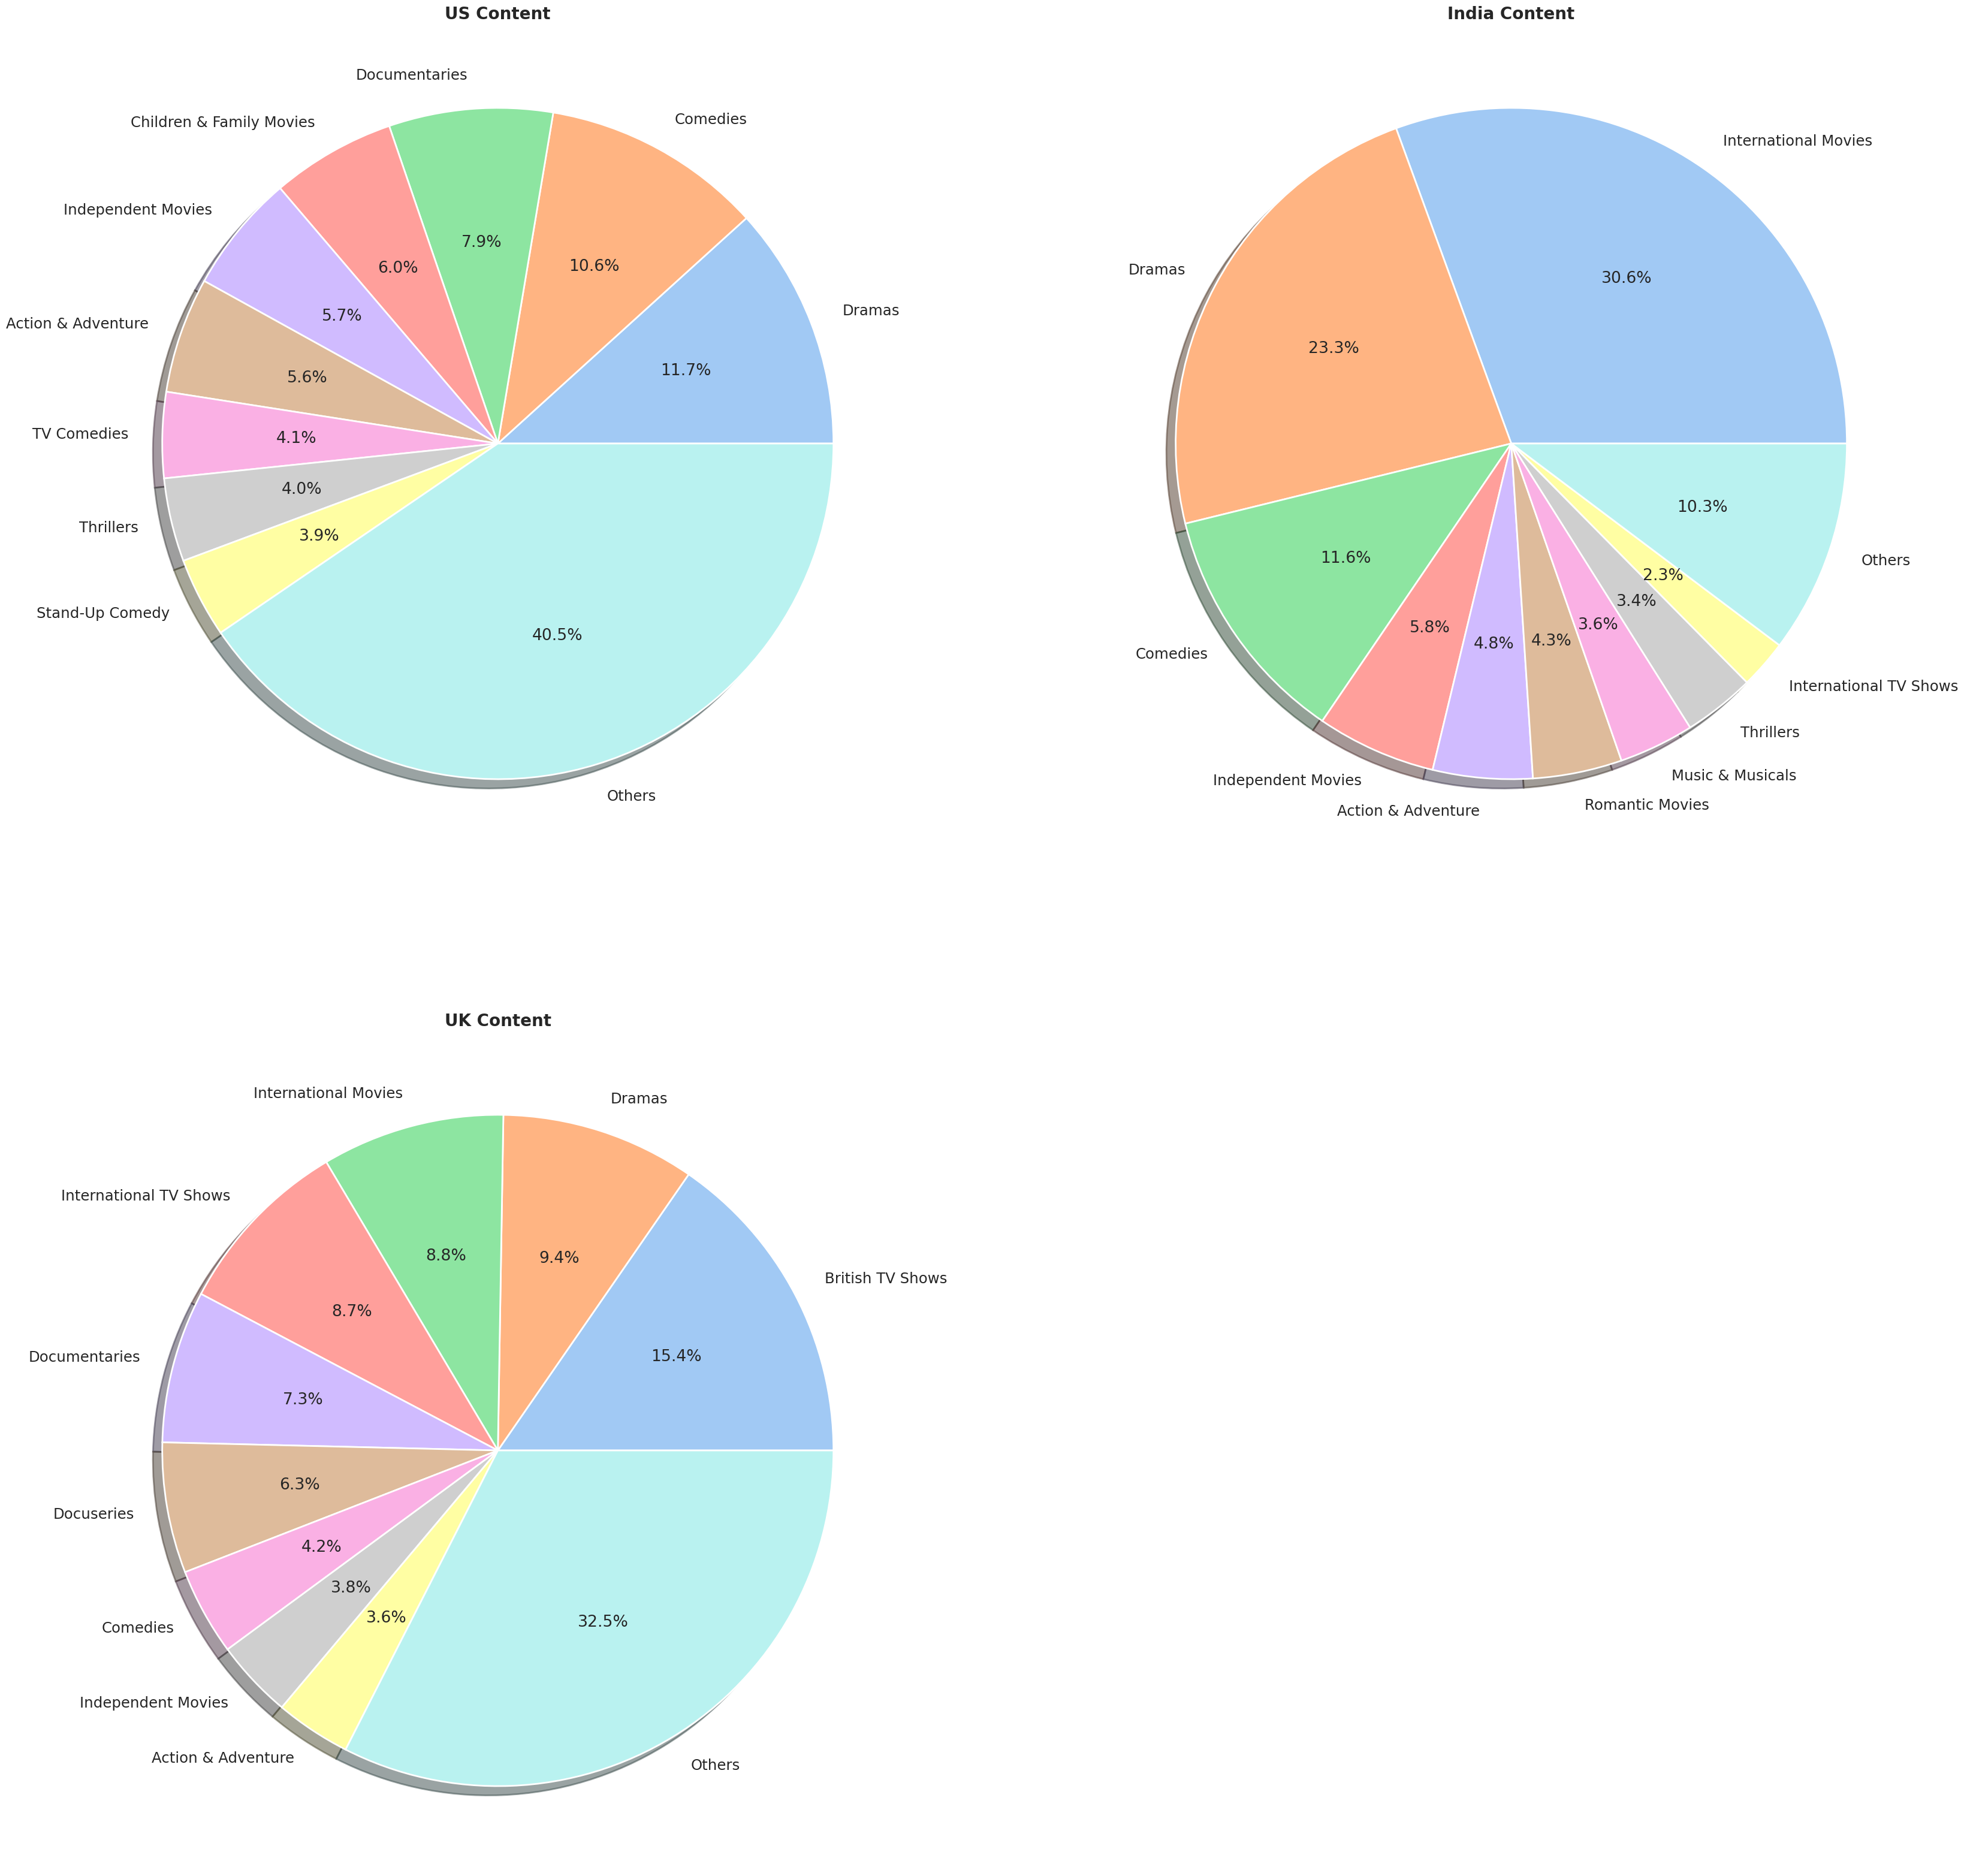

In [39]:
#Make new dataframe for each country
df_US = df_net[df_net['main_country'] == 'United States']
df_In = df_net[df_net['main_country'] == 'India']
df_UK = df_net[df_net['main_country'] == 'United Kingdom']

#Function which return sizes and labels for pie chart
def show_pie(df):
    genre = [(lambda x: x)(x.strip()) for x in ','.join(df['listed_in']).split(',')]
    df_list = list(Counter(genre).most_common(9))
    total_genre=len(genre)
    labels = [(lambda x:x)(x[0]) for x in df_list]
    labels.append('Others')
    sizes = [(lambda x:x)(x[1]) for x in df_list]
    sizes.append(total_genre - sum(sizes))
    return sizes, labels

#Get the sizes and labels
US_sizes, US_labels = show_pie(df_US)
In_sizes, In_labels = show_pie(df_In)
UK_sizes, UK_labels = show_pie(df_UK)

#Visualizing using matplotlib
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2,2, figsize=(40,40))
ax1.pie(US_sizes, labels=US_labels, autopct='%1.1f%%', shadow=True)
ax1.set_title('US Content', size=20, fontweight='bold')
ax2.pie(In_sizes, labels=In_labels, autopct='%1.1f%%', shadow=True)
ax2.set_title('India Content', size=20, fontweight='bold')
ax3.pie(UK_sizes, labels=UK_labels, autopct='%1.1f%%', shadow=True)
ax3.set_title('UK Content', size=20, fontweight='bold')
#Dummy
ax4.pie(UK_sizes, labels=UK_labels, autopct='%1.1f%%', shadow=True)
ax4.set_visible(False)
plt.show()

**Is Netflix has increasingly focusing on TV rather than movies in recent years?**



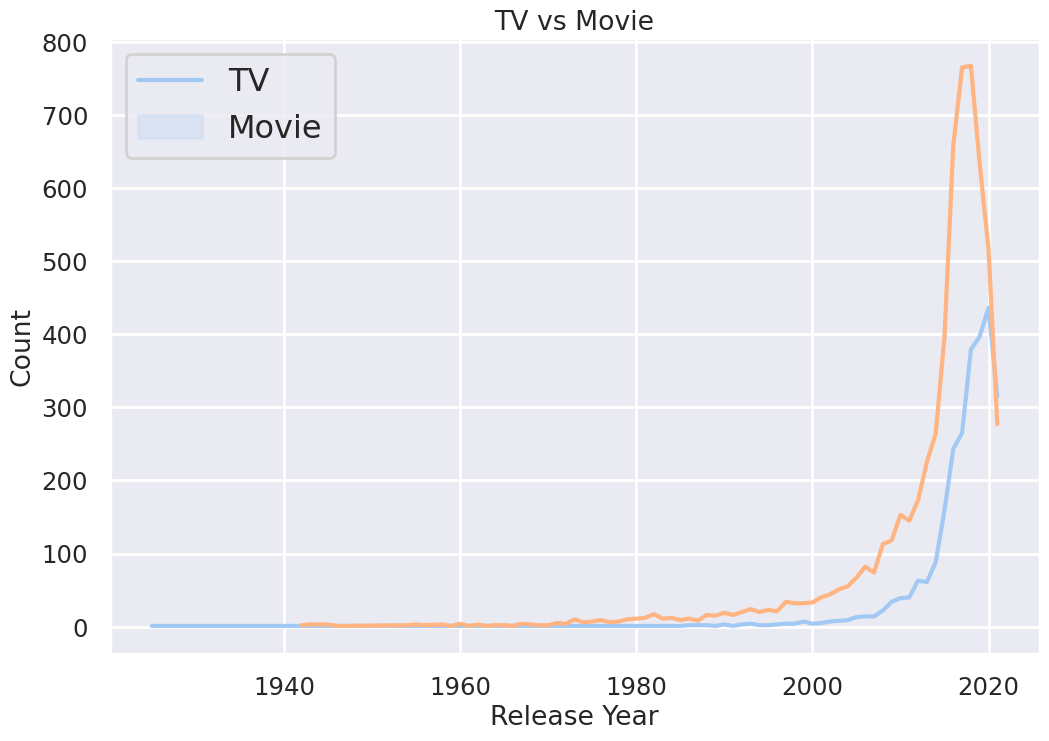

In [40]:
#Making new dataframe to seperate TV & Movie
df_TV = df_net[df_net['type']=='TV Show'].groupby('release_year').count()
df_Movie = df_net[df_net['type']=='Movie'].groupby('release_year').count()

#Visualizing using matplotlib
plt.figure(figsize=(12,8))
sns.set_context("poster", font_scale = 0.8)
sns.lineplot(data=df_TV['show_id'], sizes=10)
sns.lineplot(data=df_Movie['show_id'])
plt.ylabel('Count')
plt.xlabel('Release Year')
plt.legend(['TV', 'Movie'], fontsize='large')
plt.title('TV vs Movie')
plt.show()